In [1]:
import numpy as np
import pandas as pd

energy_consumption = np.array([500, 800, 1200, 600, 700, 1000])
renewable_sources = ['Solar', 'Wind', 'Hydropower', 'Geothermal', 'Biomass', 'Nuclear']

for source, consumption in zip(renewable_sources, energy_consumption):
    print(f"{source}: {consumption} MWh")

original_data = np.array([500, 800, 1200, 600, 700, 1000])
print("\nOriginal Energy Consumption Data (with Missing Values):")
print(original_data)

data = {
    'Energy Source': renewable_sources,
    'Consumption (MWh)': energy_consumption,
    'Cost per MWh ($)': [50, 40, np.nan, 60, 45, np.nan]
}

df = pd.DataFrame(data)

print("\nSample DataFrame with Missing Values:")
print(df)


Solar: 500 MWh
Wind: 800 MWh
Hydropower: 1200 MWh
Geothermal: 600 MWh
Biomass: 700 MWh
Nuclear: 1000 MWh

Original Energy Consumption Data (with Missing Values):
[ 500  800 1200  600  700 1000]

Sample DataFrame with Missing Values:
  Energy Source  Consumption (MWh)  Cost per MWh ($)
0         Solar                500              50.0
1          Wind                800              40.0
2    Hydropower               1200               NaN
3    Geothermal                600              60.0
4       Biomass                700              45.0
5       Nuclear               1000               NaN


In [2]:
df_cleaned = df.dropna()

print("\nDataFrame After Removing Rows with Missing Values:")
print(df_cleaned)



DataFrame After Removing Rows with Missing Values:
  Energy Source  Consumption (MWh)  Cost per MWh ($)
0         Solar                500              50.0
1          Wind                800              40.0
3    Geothermal                600              60.0
4       Biomass                700              45.0


In [4]:
df_filled = df.ffill()

print("\nDataFrame After Forward Filling Missing Values:")
print(df_filled)



DataFrame After Forward Filling Missing Values:
  Energy Source  Consumption (MWh)  Cost per MWh ($)
0         Solar                500              50.0
1          Wind                800              40.0
2    Hydropower               1200              40.0
3    Geothermal                600              60.0
4       Biomass                700              45.0
5       Nuclear               1000              45.0


In [5]:
df['Consumption (MWh)'] = df['Consumption (MWh)'].fillna(df['Consumption (MWh)'].mean())
df['Cost per MWh ($)'] = df['Cost per MWh ($)'].fillna(df['Cost per MWh ($)'].mean())

print(df)


  Energy Source  Consumption (MWh)  Cost per MWh ($)
0         Solar                500             50.00
1          Wind                800             40.00
2    Hydropower               1200             48.75
3    Geothermal                600             60.00
4       Biomass                700             45.00
5       Nuclear               1000             48.75


In [6]:
df['Consumption Missing Flag'] = df['Consumption (MWh)'].isna()

print("\nDataFrame with Flag for Missing Values in 'Consumption (MWh)':")
print(df)



DataFrame with Flag for Missing Values in 'Consumption (MWh)':
  Energy Source  Consumption (MWh)  Cost per MWh ($)  Consumption Missing Flag
0         Solar                500             50.00                     False
1          Wind                800             40.00                     False
2    Hydropower               1200             48.75                     False
3    Geothermal                600             60.00                     False
4       Biomass                700             45.00                     False
5       Nuclear               1000             48.75                     False


In [8]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --------------------------- ------------ 7.6/11.1 MB 47.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 46.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/43.6 MB ? eta -:--:--
   ------------------ --------------------- 19.7/43.6 MB 95.6 MB/s eta 0:00:01
   --------------------------------- ------ 36.2/43.6 MB 85.3 MB/s eta 0:00:01
   ---------------------------------------- 43.6/43.6 MB 75.0 MB/s eta 0:00:00


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Consumption (MWh)', 'Cost per MWh ($)']] = scaler.fit_transform(df[['Consumption (MWh)', 'Cost per MWh ($)']])
print("\nDataFrame After Standardizing 'Consumption (MWh)' and 'Cost per MWh ($)':")
print(df)



DataFrame After Standardizing 'Consumption (MWh)' and 'Cost per MWh ($)':
  Energy Source  Consumption (MWh)  Cost per MWh ($)  Consumption Missing Flag
0         Solar      -1.260252e+00          0.207020                     False
1          Wind      -1.632354e-16         -1.449138                     False
2    Hydropower       1.680336e+00          0.000000                     False
3    Geothermal      -8.401681e-01          1.863177                     False
4       Biomass      -4.200840e-01         -0.621059                     False
5       Nuclear       8.401681e-01          0.000000                     False


In [11]:
df_encoded = pd.get_dummies(df, columns=['Energy Source'])

print("\nDataFrame After One-Hot Encoding 'Energy Source':")
print(df_encoded)



DataFrame After One-Hot Encoding 'Energy Source':
   Consumption (MWh)  Cost per MWh ($)  Consumption Missing Flag  \
0      -1.260252e+00          0.207020                     False   
1      -1.632354e-16         -1.449138                     False   
2       1.680336e+00          0.000000                     False   
3      -8.401681e-01          1.863177                     False   
4      -4.200840e-01         -0.621059                     False   
5       8.401681e-01          0.000000                     False   

   Energy Source_Biomass  Energy Source_Geothermal  Energy Source_Hydropower  \
0                  False                     False                     False   
1                  False                     False                     False   
2                  False                     False                      True   
3                  False                      True                     False   
4                   True                     False                     F

In [16]:
df['Energy Consumption per Million $'] = df['Consumption (MWh)'] / df['Cost per MWh ($)'] * 1_000_000

print("\nDataFrame with 'Energy Consumption per Million $' Feature:")
print(df)



DataFrame with 'Energy Consumption per Million $' Feature:
  Energy Source  Consumption (MWh)  Cost per MWh ($)  \
0         Solar      -1.260252e+00          0.207020   
1          Wind      -1.632354e-16         -1.449138   
2    Hydropower       1.680336e+00          0.000000   
3    Geothermal      -8.401681e-01          1.863177   
4       Biomass      -4.200840e-01         -0.621059   
5       Nuclear       8.401681e-01          0.000000   

   Consumption Missing Flag  Energy Consumption per Million $  
0                     False                     -6.087596e+06  
1                     False                      1.126432e-10  
2                     False                               inf  
3                     False                     -4.509330e+05  
4                     False                      6.763995e+05  
5                     False                               inf  


C:\Users\User\AppData\Local\Temp\ipykernel_11008\903454303.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2, 2].set_xticklabels(["Consumption (MWh)", "Cost per MWh ($)"], rotation=45)  # Correct way to set x-tick labels


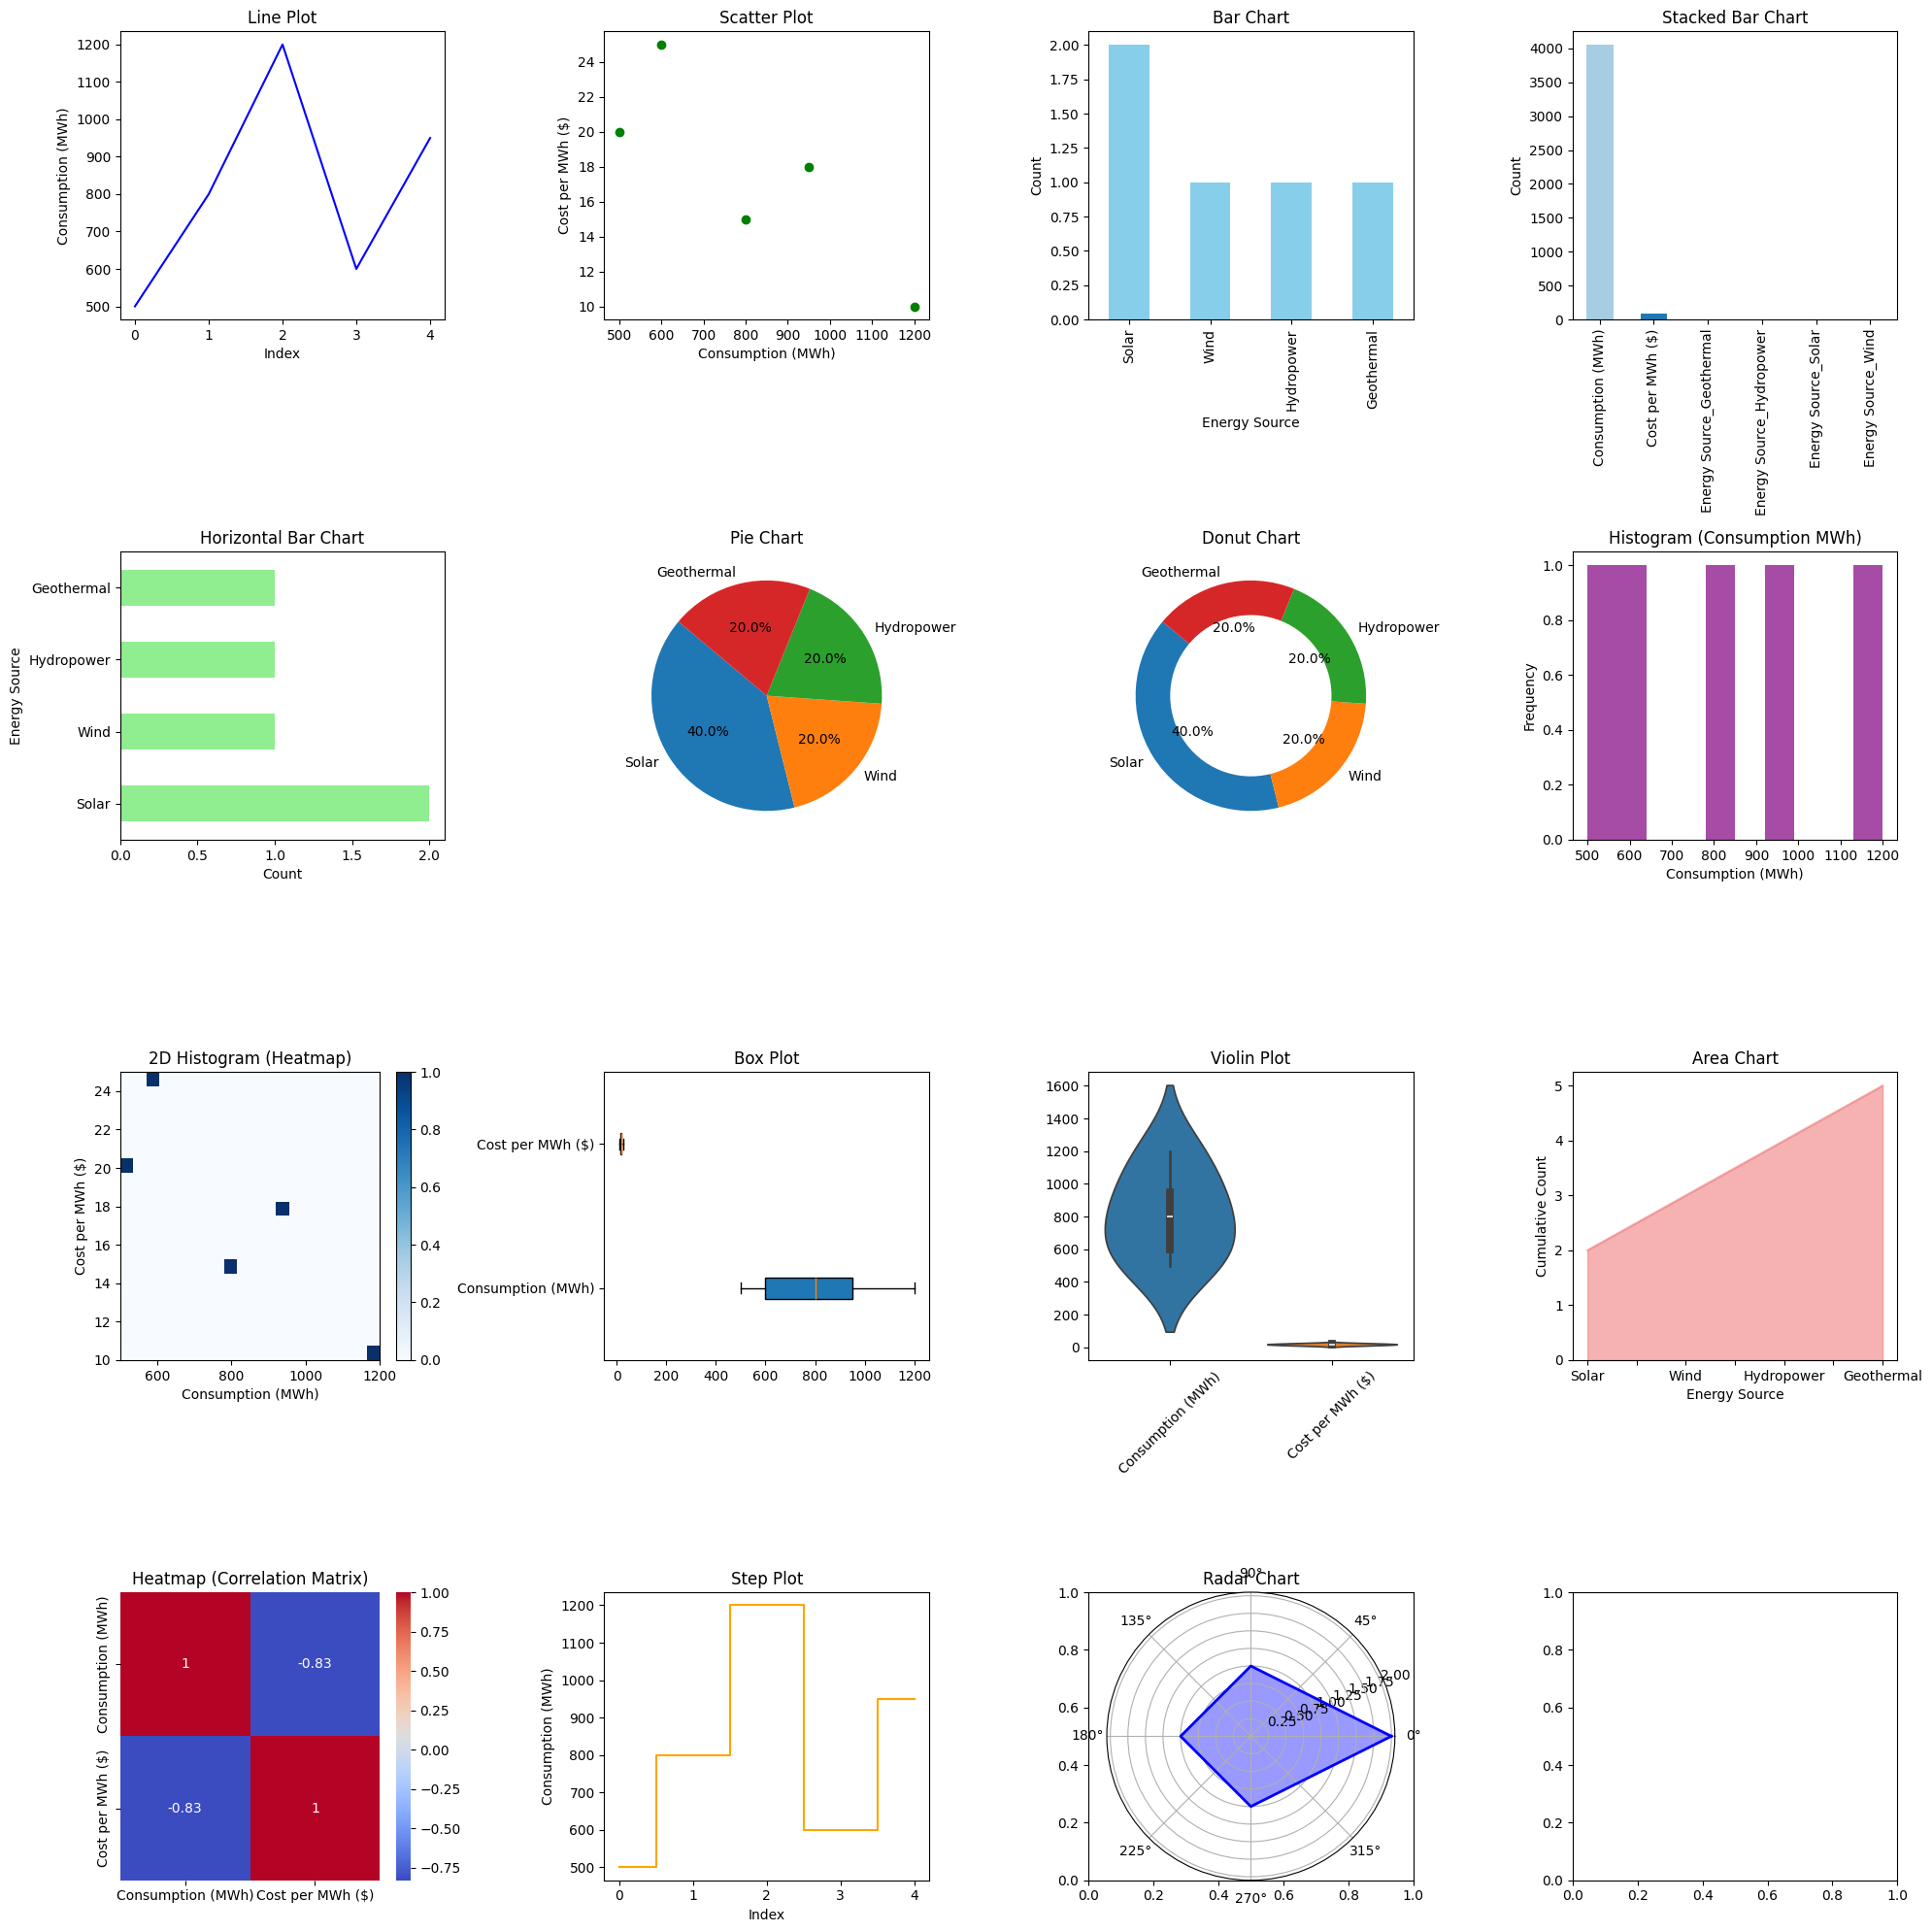

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Sample data for plotting (make sure to replace this with your actual data)
df = pd.DataFrame({
    'Energy Source': ['Solar', 'Wind', 'Hydropower', 'Geothermal', 'Solar'],
    'Consumption (MWh)': [500, 800, 1200, 600, 950],
    'Cost per MWh ($)': [20, 15, 10, 25, 18]
})

# Sample data for plotting
energy_source_counts = df['Energy Source'].value_counts()
consumption = df['Consumption (MWh)'].dropna()
cost = df['Cost per MWh ($)'].dropna()

# Set up a figure with multiple subplots (4 rows, 4 columns)
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

# 1. Line Plot
axes[0, 0].plot(consumption, color='blue', label='Consumption')
axes[0, 0].set_title("Line Plot")
axes[0, 0].set_xlabel("Index")
axes[0, 0].set_ylabel("Consumption (MWh)")

# 2. Scatter Plot
axes[0, 1].scatter(consumption, cost, color='green')
axes[0, 1].set_title("Scatter Plot")
axes[0, 1].set_xlabel("Consumption (MWh)")
axes[0, 1].set_ylabel("Cost per MWh ($)")

# 3. Bar Chart
energy_source_counts.plot(kind='bar', color='skyblue', ax=axes[0, 2])
axes[0, 2].set_title("Bar Chart")
axes[0, 2].set_ylabel("Count")
axes[0, 2].set_xlabel("Energy Source")

# 4. Stacked Bar Chart
df_encoded = pd.get_dummies(df, columns=['Energy Source'])
df_encoded.sum().plot(kind='bar', stacked=True, color=plt.cm.Paired.colors, ax=axes[0, 3])
axes[0, 3].set_title("Stacked Bar Chart")
axes[0, 3].set_ylabel("Count")

# 5. Horizontal Bar Chart
energy_source_counts.plot(kind='barh', color='lightgreen', ax=axes[1, 0])
axes[1, 0].set_title("Horizontal Bar Chart")
axes[1, 0].set_xlabel("Count")
axes[1, 0].set_ylabel("Energy Source")

# 6. Pie Chart
axes[1, 1].pie(energy_source_counts, labels=energy_source_counts.index, autopct='%1.1f%%', startangle=140)
axes[1, 1].set_title("Pie Chart")

# 7. Donut Chart
axes[1, 2].pie(energy_source_counts, labels=energy_source_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3})
axes[1, 2].set_title("Donut Chart")

# 8. Histogram
axes[1, 3].hist(consumption, bins=10, color='purple', alpha=0.7)
axes[1, 3].set_title("Histogram (Consumption MWh)")
axes[1, 3].set_xlabel("Consumption (MWh)")
axes[1, 3].set_ylabel("Frequency")

# 9. 2D Histogram (Heatmap)
hb = axes[2, 0].hist2d(consumption, cost, bins=20, cmap='Blues')
axes[2, 0].set_title("2D Histogram (Heatmap)")
axes[2, 0].set_xlabel("Consumption (MWh)")
axes[2, 0].set_ylabel("Cost per MWh ($)")
plt.colorbar(hb[3], ax=axes[2, 0])

# 10. Box Plot (Fixing the deprecation warning)
axes[2, 1].boxplot([consumption, cost], vert=False, patch_artist=True)
axes[2, 1].set_title("Box Plot")
axes[2, 1].set_yticklabels(["Consumption (MWh)", "Cost per MWh ($)"])  # This is fine, setting y-tick labels

# 11. Violin Plot (using seaborn)
sns.violinplot(data=[consumption, cost], ax=axes[2, 2])
axes[2, 2].set_title("Violin Plot")
axes[2, 2].set_xticklabels(["Consumption (MWh)", "Cost per MWh ($)"], rotation=45)  # Correct way to set x-tick labels



# 12. Area Chart
energy_source_counts.cumsum().plot(kind='area', color='lightcoral', alpha=0.6, ax=axes[2, 3])
axes[2, 3].set_title("Area Chart")
axes[2, 3].set_ylabel("Cumulative Count")

# 13. Heatmap (using seaborn) - Excluding non-numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[3, 0])
axes[3, 0].set_title("Heatmap (Correlation Matrix)")

# 14. Step Plot
axes[3, 1].step(range(len(consumption)), consumption, where='mid', color='orange')
axes[3, 1].set_title("Step Plot")
axes[3, 1].set_xlabel("Index")
axes[3, 1].set_ylabel("Consumption (MWh)")

# 15. Radar Chart (using polar projection)
# Create a polar subplot using 'projection='polar''
ax = plt.subplot(4, 4, 15, polar=True)

# Now we can plot the radar chart on this polar axis.
angles = np.linspace(0, 2 * np.pi, len(energy_source_counts), endpoint=False).tolist()
values = energy_source_counts.values
values = np.concatenate((values, [values[0]]))  # Close the circle
angles = np.concatenate((angles, [angles[0]]))

ax.plot(angles, values, color='blue', linewidth=2, linestyle='solid')
ax.fill(angles, values, color='blue', alpha=0.4)

ax.set_title("Radar Chart")

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


   Energy Consumption (MWh)  Carbon Emissions (tons CO2)
0                       500                           12
1                       800                           20
2                      1200                           18
3                       600                           15
4                       700                           14
5                      1000                           22
6                       900                           19
7                      1100                           24
8                      1400                           28
9                      1300                           26


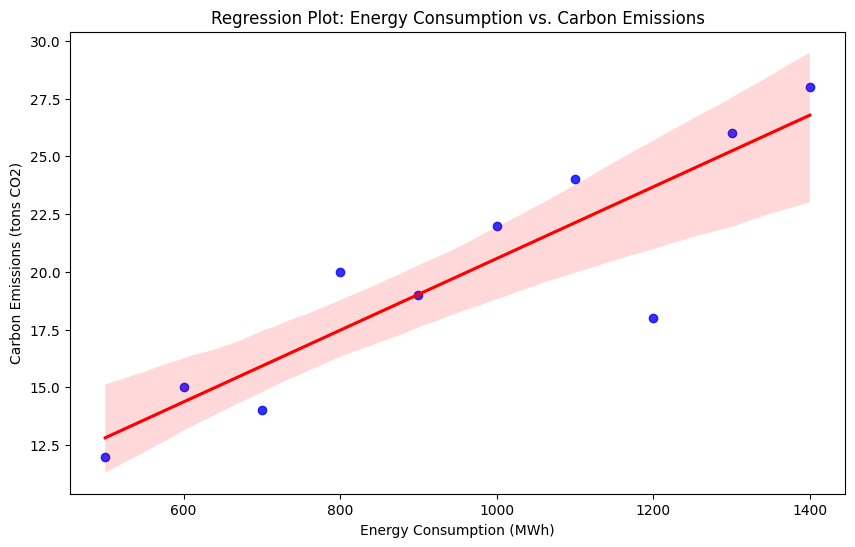

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample energy consumption (MWh) and carbon emissions (tons of CO2)
energy_consumption = np.array([500, 800, 1200, 600, 700, 1000, 900, 1100, 1400, 1300])
carbon_emissions = np.array([12, 20, 18, 15, 14, 22, 19, 24, 28, 26])  # Example emission data

# Create a DataFrame
data = {
    'Energy Consumption (MWh)': energy_consumption,
    'Carbon Emissions (tons CO2)': carbon_emissions
}
df = pd.DataFrame(data)

# Display DataFrame
print(df)

# Create a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Energy Consumption (MWh)', y='Carbon Emissions (tons CO2)', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Regression Plot: Energy Consumption vs. Carbon Emissions')
plt.xlabel('Energy Consumption (MWh)')
plt.ylabel('Carbon Emissions (tons CO2)')
plt.show()
